# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist

- **Nama:** Cynthia Caroline
- **Email:** Cynthiacc512@gmail.com
- **ID Dicoding:** meecyn

## Menentukan Pertanyaan Bisnis

1. Apakah jumlah pembelian produk memang benar benar ada hubungannya dengan rating?
2. Apakah harga produk yang "murah" memang bisa efektif meningkatkan jumlah pembelian?
3. Apakah lokasi seller menentukan penjualan barang??

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# !pip install pipreqs

# from google.colab import drive
# drive.mount('/content/drive')

!pipreqs "/content/drive/MyDrive/Colab Notebooks/Dicoding/" --scan-notebooks


## Data Wrangling

### Gathering Data

In [ ]:
order_items = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding/Data/order_items_dataset.csv")
order_reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding/Data/order_reviews_dataset.csv")
products = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding/Data/products_dataset.csv")
sellers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding/Data/sellers_dataset.csv")

In [ ]:
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Cleaning Data

In [ ]:
# Ambil fitur yang akan digunakan
# Note: sengaja ga pakai fungsi drop krn jadi  effort buat nulis fiturnya

order_items_cleaned= order_items[['order_id', 'product_id', 'price', 'seller_id']].copy()
order_reviews_cleaned = order_reviews[['order_id', 'review_score']].copy()
products_cleaned = products[['product_id']].copy()
sellers_cleaned = sellers[['seller_id', 'seller_state']].copy()

print("order_items_cleaned: ", order_items_cleaned.columns.tolist())
print("order_reviews_cleaned: ", order_reviews_cleaned.columns.tolist())
print("products_cleaned: ", products_cleaned.columns.tolist())
print("sellers_cleaned: ", sellers_cleaned.columns.tolist())


order_items_cleaned:  ['order_id', 'product_id', 'price', 'seller_id']
order_reviews_cleaned:  ['order_id', 'review_score']
products_cleaned:  ['product_id']
sellers_cleaned:  ['seller_id', 'seller_state']


**Insight:** Di sini saya tidak melakukan tambahan cleaning lain seperti drop data duplicate, karena dengan asumsi mungkin saja buyer/seller membeli barang yang serupa namun checkout nya 2x. Saya melakukan drop column karena hanya ingin mengambil fitur yang ingin digunakan saja agar algoritma dapat berjalan lebih ringan. Mengenai missing value, memang ditemukan tapi dalam pencarian insight ini tidak digunakan (seperti komentar dll), sehingga saya tidak mengurus itu lebih lanjut.

### Assessing Data

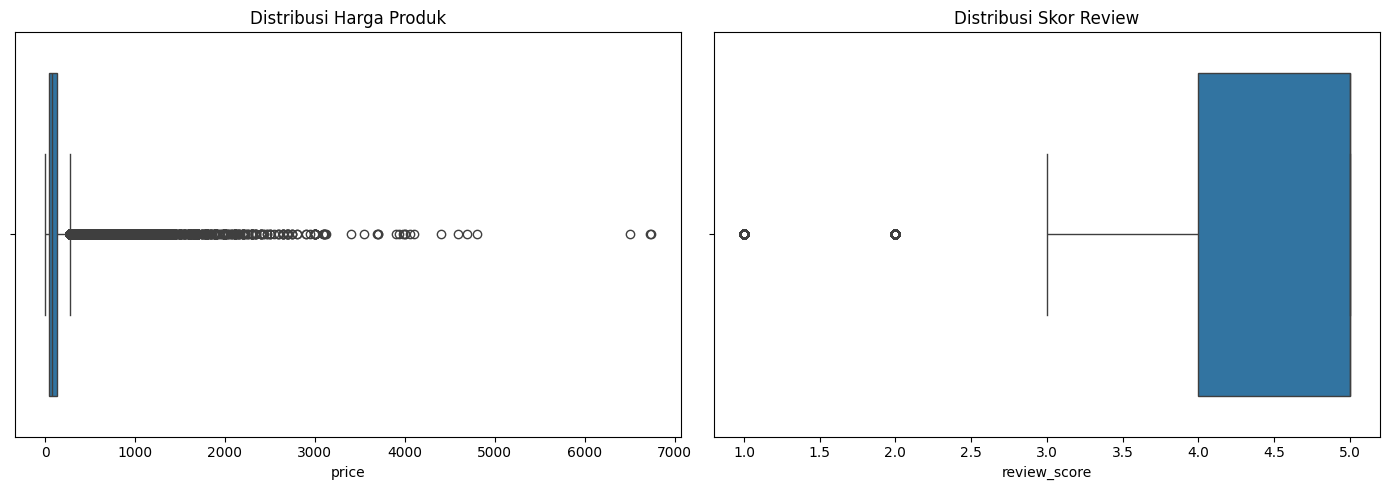

In [ ]:
# Cek distribusi dan outlier potensial untuk kolom price dan review_score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribusi harga
sns.boxplot(data=order_items_cleaned, x='price', ax=axes[0])
axes[0].set_title("Distribusi Harga Produk")

# Distribusi skor review
sns.boxplot(data=order_reviews_cleaned, x='review_score', ax=axes[1])
axes[1].set_title("Distribusi Skor Review")

plt.tight_layout()
plt.show()


Pola ini memperlihatkan bahwa memang banyak produk murah di ecommerce dan ratingnya baik (4 dan 5). Dapat disimpulkan bahwa memang rata rata user puas dengan ecommerce ini, bukanlah suatu error atau data yang aneh. Memang ditemukan outlier, mungkin merupakan produk mahal, namun jumlahnya tidak seberapa banyak, sehingga akan kurang optimal kalau "dipaksakan" untuk menjadi normal distribution (oversampling, etc)

## Exploratory Data Analysis (EDA)

### Explore ...

#### Pertanyaan 1 = Apakah jumlah pembelian produk memang benar benar ada hubungannya dengan rating?

In [ ]:
# Merge dulu informasi order dengan review
merged_df = pd.merge(order_items_cleaned, order_reviews_cleaned[['order_id', 'review_score']], on='order_id', how='inner')

# Hitung total pembelian per produk
purchase_count = merged_df.groupby('product_id').size().reset_index(name='total_purchased')

# Avg rating per produk
avg_rating = merged_df.groupby('product_id')['review_score'].mean().reset_index(name='average_rating')

# Cek hasil
product_analysis = pd.merge(purchase_count, avg_rating, on='product_id')
product_analysis.sort_values(by='total_purchased', ascending=False).head()


,product_id,total_purchased,average_rating
22000,aca2eb7d00ea1a7b8ebd4e68314663af,524,4.019084
8562,422879e10f46682990de24d770e7f83d,486,3.946502
19640,99a4788cb24856965c36a24e339b6058,482,3.898340
7320,389d119b48cf3043d311335e499d9c6b,391,4.117647
7038,368c6c730842d78016ad823897a372db,388,3.922680


#### Pertanyaan 2 = Apakah harga produk yang "murah" memang bisa efektif meningkatkan jumlah pembelian?

In [ ]:
# Ambil kolom harga dan produk dari order_items
price_info = order_items_cleaned[['product_id', 'price']]

# Hitung harga rata-rata per produk
avg_price = price_info.groupby('product_id')['price'].mean().reset_index(name='average_price')

# Gabungkan dengan data sebelumnya (product_analysis)
product_analysis = pd.merge(product_analysis, avg_price, on='product_id')

# Cek hasil
product_analysis.sort_values(by='total_purchased', ascending=False).head()


,product_id,total_purchased,average_rating,average_price
22000,aca2eb7d00ea1a7b8ebd4e68314663af,524,4.019084,71.364137
8562,422879e10f46682990de24d770e7f83d,486,3.946502,54.911612
19640,99a4788cb24856965c36a24e339b6058,482,3.898340,88.167131
7320,389d119b48cf3043d311335e499d9c6b,391,4.117647,54.695383
7038,368c6c730842d78016ad823897a372db,388,3.922680,54.270103


#### Pertanyaan 3

In [ ]:
# Gabungkan data produk, order dan seller
merged_data = order_items_cleaned.merge(products_cleaned, on='product_id', how='left')
merged_data = merged_data.merge(order_reviews_cleaned[['order_id', 'review_score']], on='order_id', how='left')
merged_data = merged_data.merge(sellers[['seller_id', 'seller_state']], on='seller_id', how='left')

# Group by seller_state untuk melihat total pembelian dan rata-rata review per lokasi seller
seller_state_analysis = merged_data.groupby('seller_state').agg({
    'order_id': 'nunique',
    'price': 'sum',
    'review_score': 'mean'
}).rename(columns={
    'order_id': 'total_orders',
    'price': 'total_sales',
    'review_score': 'avg_review_score'
}).reset_index()

## Visualization & Explanatory Analysis

### Pertanyaan 1 = Apakah jumlah pembelian produk memang benar benar ada hubungannya dengan rating?

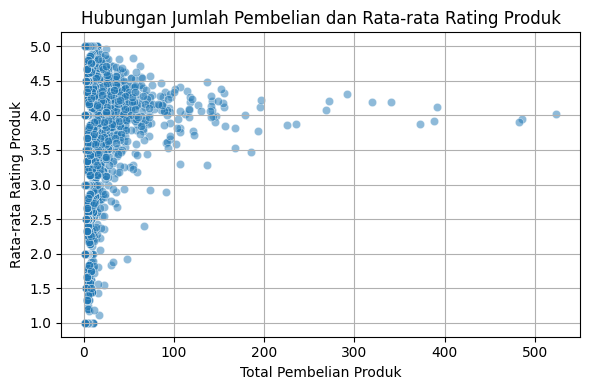

np.float64(-0.004073150703581997)

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=product_analysis, x='total_purchased', y='average_rating', alpha=0.5)
plt.title("Hubungan Jumlah Pembelian dan Rata-rata Rating Produk")
plt.xlabel("Total Pembelian Produk")
plt.ylabel("Rata-rata Rating Produk")
plt.grid(True)
plt.tight_layout()
plt.show()

# Hitung korelasi Pearson
correlation = product_analysis['total_purchased'].corr(product_analysis['average_rating'])
correlation

**Insight:**

Korelasi Pearson antara jumlah pembelian dan rata-rata rating sangat lemah, bahkan diangka minus, yaitu -0.0041. Artinya memang tidak ada hubungan apapun antara banyaknya produk yang dibeli customer dengan rating yang diberikannya pada apps ecommerce. Dapat disimpulkan lebih dalam lagi, artinya bisa saja orang yang membeli banyak itu memang karena puas dengan harga dan kualitas, tapi bisa saja yang membeli banyak merasa tidak puas (entah terjebak marketing atau kena rayuan harga murah).


### Pertanyaan 2 = Apakah harga produk yang "murah" memang bisa efektif meningkatkan jumlah pembelian?

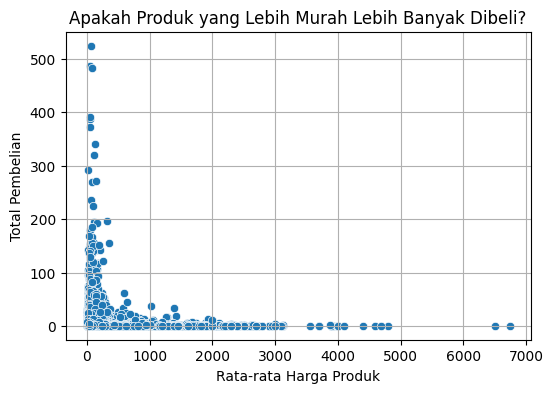

np.float64(-0.032690974234773046)

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=product_analysis, x='average_price', y='total_purchased')
plt.xlabel("Rata-rata Harga Produk")
plt.ylabel("Total Pembelian")
plt.title("Apakah Produk yang Lebih Murah Lebih Banyak Dibeli?")
plt.grid(True)
plt.show()

correlation = product_analysis['average_price'].corr(product_analysis['total_purchased'])
correlation

Data ini pun memberikan korelasi yang sangat lemah, yaitu -0.033, yang artinya belum tentu harga murah dari produk menjadi jaminan untuk mendorong penjualan lebih besar. Perlu dicari lebih lanjut terhadap faktor lain seperti rating, deskripsi produk, merk, yang mungkin jauh lebih berpengaruh ketimbang sekedar harga murah.

### Pertanyaan 3

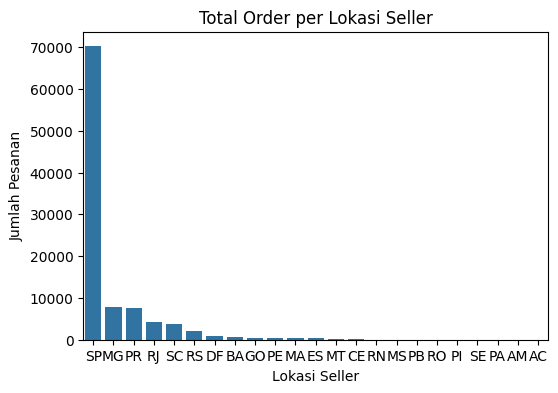

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=seller_state_analysis.sort_values('total_orders', ascending=False), x='seller_state', y='total_orders')
plt.title("Total Order per Lokasi Seller")
plt.xlabel("Lokasi Seller")
plt.ylabel("Jumlah Pesanan")
plt.show()


Terlihat secara kontras bahwa SP (Sao Paulo) sangat mendominasi order. Hal ini menjadi wajar karena kota ini memang sangat besar dan "strategis" di Brazil. Ini memiliki arti bahwa lokasi seller memang sangat berpengaruh terhadap jumlah penjualan. Kemungkinan terbesar memang dikarenakan karena perekonomiannya yang sangat hidup atau jumlah penduduknya yang sangat banyak.


## Analisis Lanjutan (Opsional)

Dari semua pertanyaan tadi, maka mulai muncul 1 pernyataan di benak saya: apakah lokasi seller dapat menjadi patokan dalam menentukan kualitas layanannya? Maka saya akan melakukan validasi menggunakan data

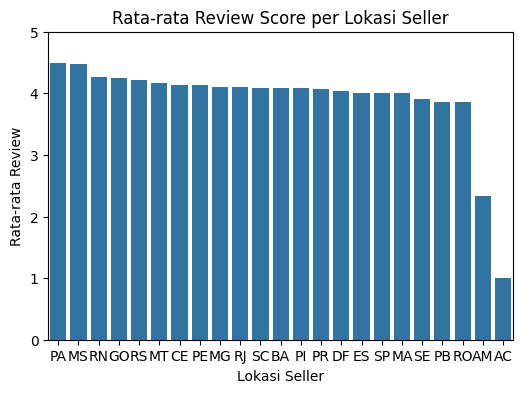

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=seller_state_analysis.sort_values('avg_review_score', ascending=False),
            x='seller_state', y='avg_review_score')
plt.title("Rata-rata Review Score per Lokasi Seller")
plt.xlabel("Lokasi Seller")
plt.ylabel("Rata-rata Review")
plt.ylim(0, 5)
plt.show()

Ternyata tidak benar kalau lokasi menjadi pengaruh pelayanan. Kalau dilihat, hampir semua lokasi menunjukkan rata rata review di atas bintang 4.

SP tidak menjadi yang terbaik, mungkin saja saking banyaknya pembelian di daerah sana, data yang masuk pun lumayan banyak dari sisi negatif.

## Conclusion

1. Rating tidak mencerminkan loyalitas pembelian. Customer yang membeli banyak produk **belum tentu** memberikan rating tinggi. Hal ini menunjukkan bahwa banyaknya transaksi tidak selalu berbanding lurus dengan kepuasan pengguna.

2. **Harga murah bukan faktor utama** dalam mendorong penjualan.
Korelasi lemah antara harga produk dan jumlah pembelian menandakan bahwa customer memang tidak hanya melihat harga sebelum membeli produk. Pastinya terdapat hal lain seperti brand, deskripsi produk, ataupun kepercayaan terhadap seller yang bisa saja jauh lebih penting untuk sebagian besar buyer.

3. Lokasi seller memengaruhi volume penjualan, tapi tidak menjamin kualitas layanan. Kota strategis seperti Sao Paulo (SP) memang sangat mendominasi penjualan karena faktor ekonomi dan jumlah penduduknya. Namun, rating seller di berbagai lokasi relatif rata, yang berarti **lokasi strategis berperan dalam kuantitas transaksi, tapi tidak dapat dijadikan tolok ukur kualitas layanan.**